In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots

# Import Data

df = pd.read_csv(r'C:\Users\rajan\Downloads\cleanedhousingdata\housing.csv')

In [2]:
# Determine data types
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [3]:
# Look for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

id - 0.0%
date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 0.0%
view - 0.0%
condition - 0.0%
grade - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 0.0%
zipcode - 0.0%
lat - 0.0%
long - 0.0%
sqft_living15 - 0.0%
sqft_lot15 - 0.0%


In [4]:
df.sort_values(by=['price'], inplace=False, ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,2014-11-05,82000,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,2015-03-24,81000,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,2014-05-23,80000,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,2014-05-06,78000,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


In [5]:
# Check correlation of all variables with price
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        
df.corr(numeric_only=True)['price']

id              -0.016762
date            -0.004649
price            1.000000
bedrooms         0.308377
bathrooms        0.525136
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256793
waterfront       0.266370
view             0.397294
condition        0.036361
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054011
yr_renovated     0.126434
zipcode         -0.053201
lat              0.307003
long             0.021626
sqft_living15    0.585378
sqft_lot15       0.082447
Name: price, dtype: float64

<Axes: xlabel='bedrooms', ylabel='price'>

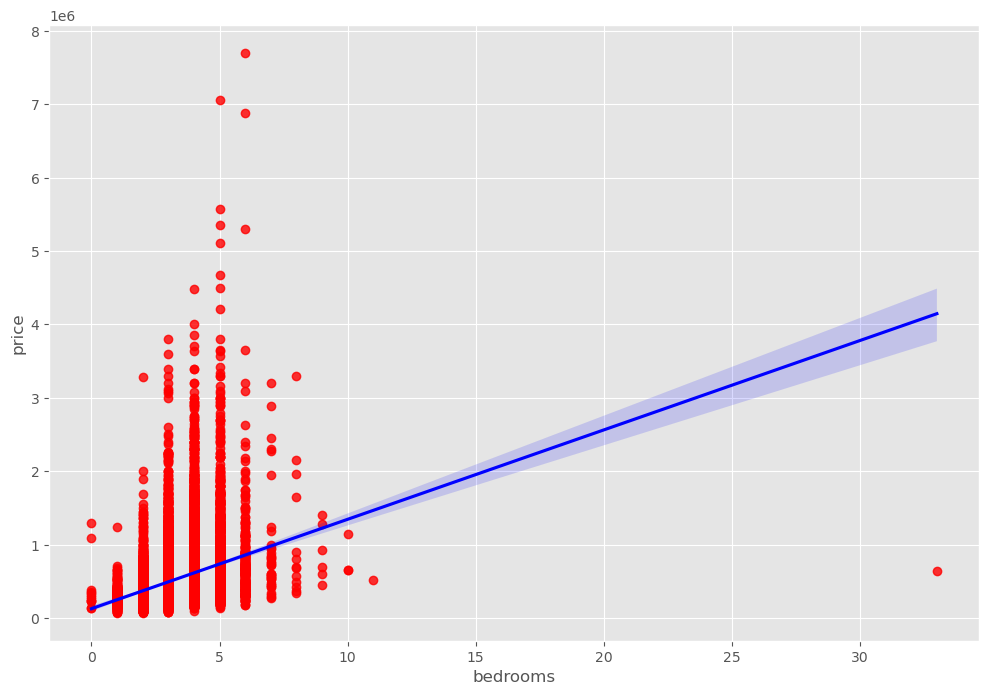

In [6]:
# Plot correlated variables 
sns.regplot(x=df['bedrooms'], y=df['price'], data =df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='bathrooms', ylabel='price'>

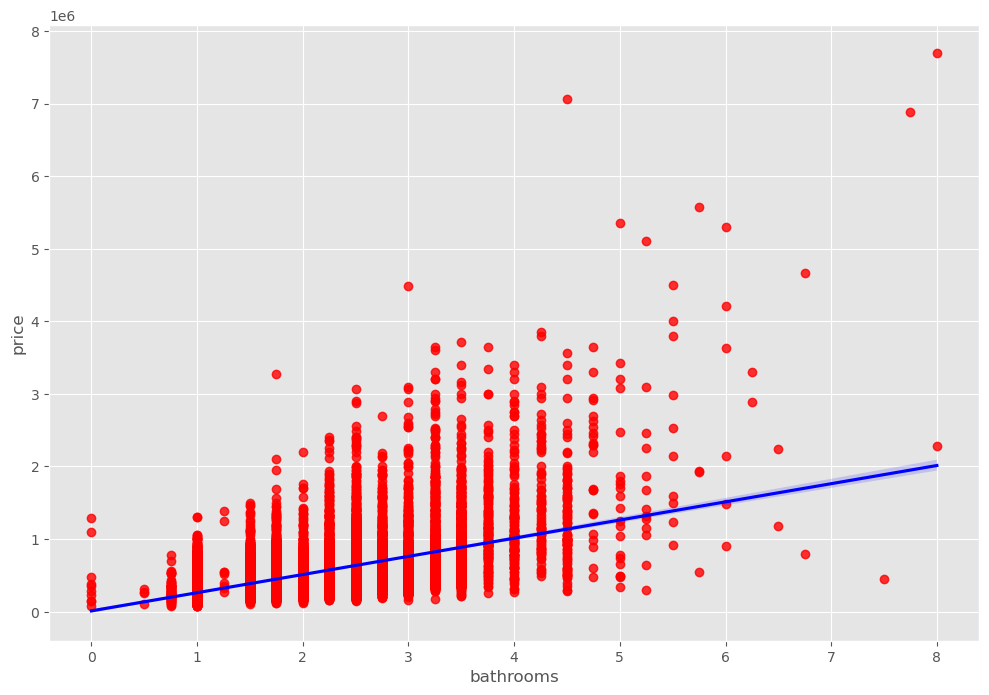

In [7]:
sns.regplot(x=df['bathrooms'], y=df['price'], data =df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='sqft_living', ylabel='price'>

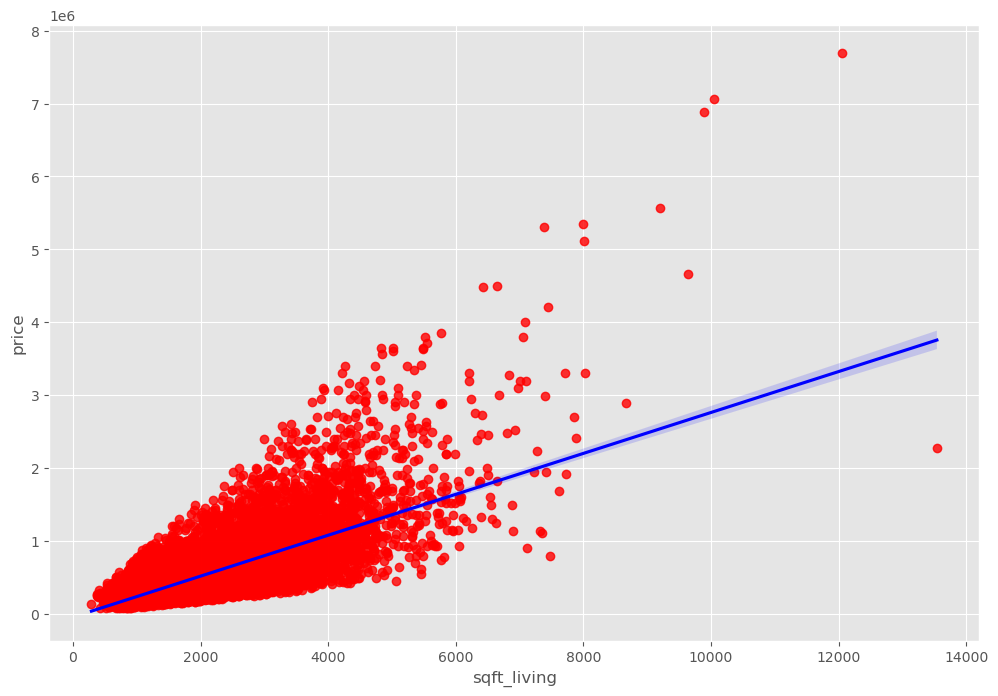

In [8]:
sns.regplot(x=df['sqft_living'], y=df['price'], data =df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='grade', ylabel='price'>

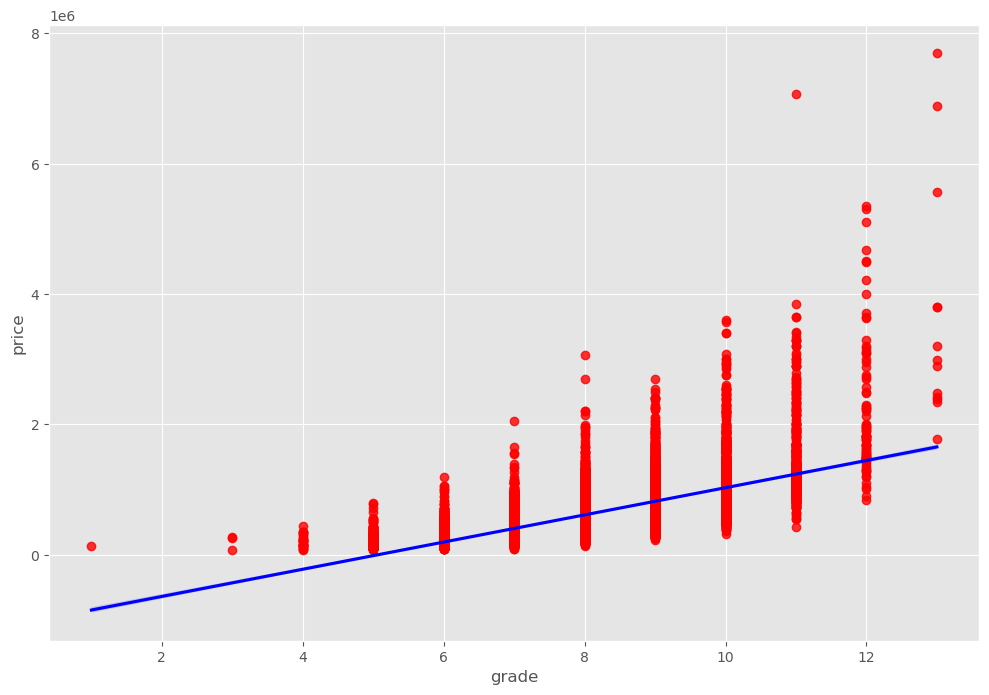

In [9]:
sns.regplot(x=df['grade'], y=df['price'], data =df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='sqft_living15', ylabel='price'>

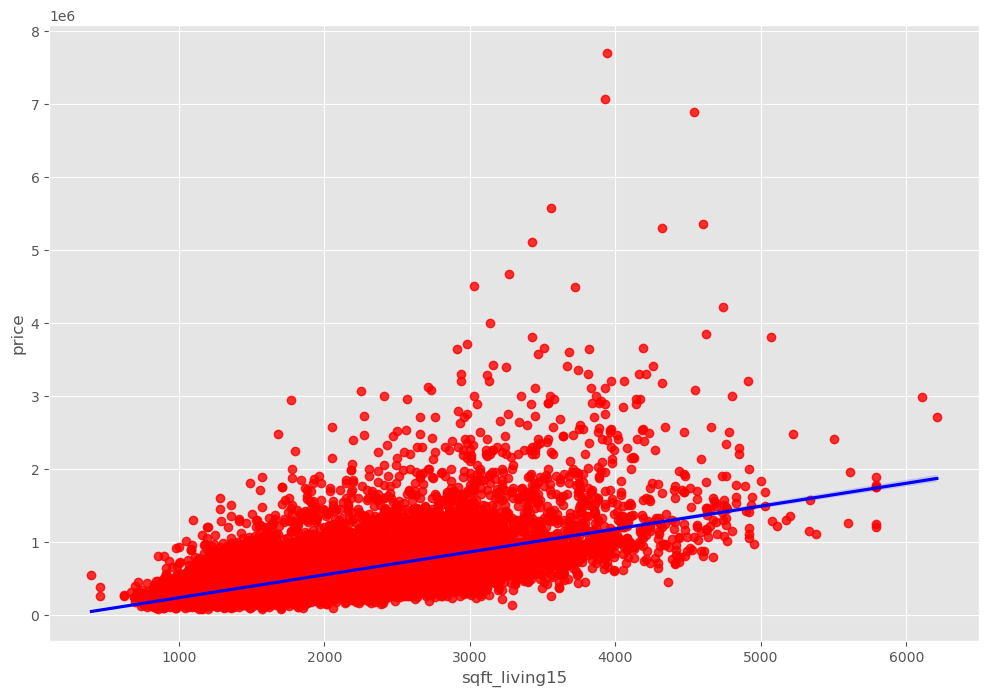

In [10]:
sns.regplot(x=df['sqft_living15'], y=df['price'], data =df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [11]:
# Include relevant independent variables for multiple linear regression model
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'waterfront', 'view', 
      'sqft_lot', 'yr_built', 'yr_renovated', 'condition']]
y=df['price']

In [49]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [50]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared = False)

In [58]:
def format_score(score):
    return "{:.10f}".format(score)

metrics = ['R^2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
scores = [format(r2), format(mae), format(mse), format(rmse)]

df1 = pd.DataFrame(list(zip(metrics,scores)), columns=['Test', 'Score'])
print(df1)

                      Test               Score
0                R^2 Score  0.6682362116544169
1      Mean Absolute Error  137605.74174058548
2       Mean Squared Error    41585389895.1952
3  Root Mean Squared Error  203924.96143237394


The R^2 shows how well the data fits the regression model through the range of 0-1. The closer this score is to one means that the better this regression model fits the data.

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

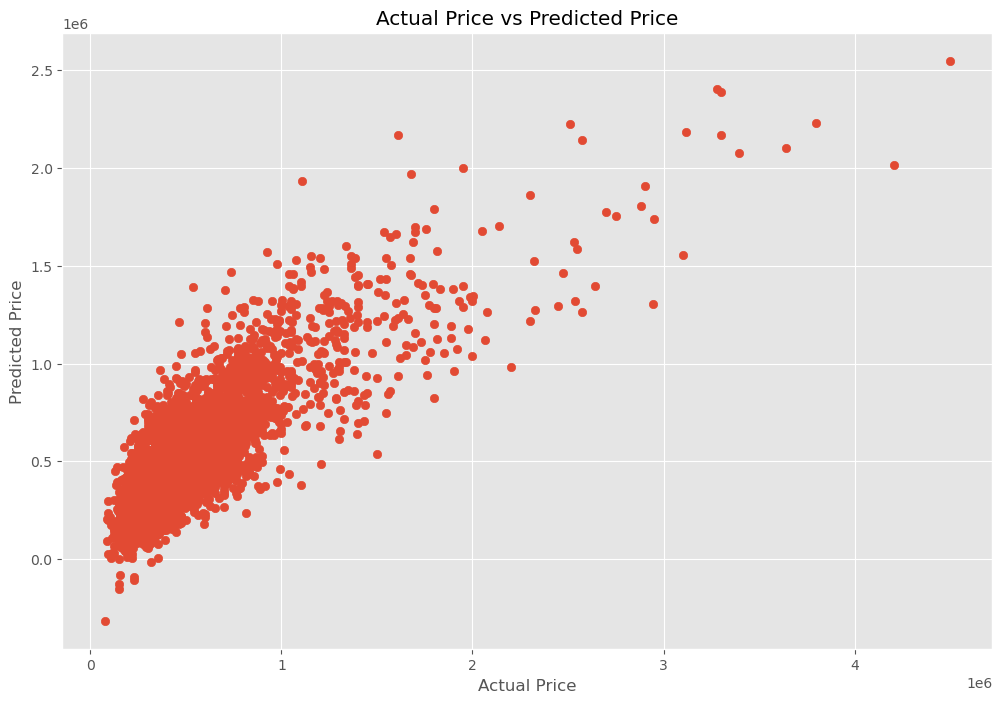

In [59]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

In [60]:
pred_y_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Price,Predicted Price,Difference
20999,353500,4.277766e+05,-74276.609232
20641,384950,4.874818e+05,-102531.797199
7065,340000,5.332241e+05,-193224.148643
21068,400950,6.186440e+05,-217693.952915
6715,602000,4.985596e+05,103440.361269
13323,715000,5.419020e+05,173098.003921
2266,210000,4.498985e+05,-239898.475298
15953,240000,4.619312e+05,-221931.201698
19656,480000,5.244309e+05,-44430.920598
17787,799000,6.316539e+05,167346.064109


Housing price is strongly correlated (correlation > |0.5|) with the following independent variables: bathrooms, square feet living area, house grade, height above sea level, and square feet living areas of the 15 nearest properties. As for the multiple linear regression model, due to the having a relatively low R^2 (value less than 0.95), the model is rather unreliable in predicting the price of the model. This could be due to multiple outliers in the data, the presence of multicollinearity, and there could be external factors such as economic conditions (housing market conditions during the year it was sold).